# MODEL 1

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [9]:
# Charger les données depuis le fichier (à adapter si besoin)
df1 = pd.read_csv("AAPL_SP500_Corrected555.csv", index_col=0, parse_dates=True)

In [10]:
df1.head()

,AAPL_Close,SP500_Close
Date,,
2020-01-02 00:00:00-05:00,72.620842,3257.850098
2020-01-03 00:00:00-05:00,71.914810,3234.850098
2020-01-06 00:00:00-05:00,72.487862,3246.280029
2020-01-07 00:00:00-05:00,72.146950,3237.179932
2020-01-08 00:00:00-05:00,73.307503,3253.050049


In [16]:
# Calcul des rendements log
df1['R_AAPL'] = np.log(df1['AAPL_Close'] / df1['AAPL_Close'].shift(1))
df1['R_mkt'] = np.log(df1['SP500_Close'] / df1['SP500_Close'].shift(1))

In [17]:
df1.head()

,AAPL_Close,SP500_Close,R_AAPL,R_mkt
Date,,,,
2020-01-02 00:00:00-05:00,72.620842,3257.850098,NaN,NaN
2020-01-03 00:00:00-05:00,71.914810,3234.850098,-0.009770,-0.007085
2020-01-06 00:00:00-05:00,72.487862,3246.280029,0.007937,0.003527
2020-01-07 00:00:00-05:00,72.146950,3237.179932,-0.004714,-0.002807
2020-01-08 00:00:00-05:00,73.307503,3253.050049,0.015958,0.004890


In [43]:
annual_rf = 0.02  # 2% annuel
trading_days = 252
daily_rf = annual_rf / trading_days  # environ 0.000079
df1['R_f'] = daily_rf

In [44]:
# Calcul des rendements excédentaires
df1['Rx_AAPL'] = df1['R_AAPL'] - df1['R_f']
df1['Rx_mkt'] = df1['R_mkt'] - df1['R_f']

In [45]:
df1

,AAPL_Close,SP500_Close,R_AAPL,R_mkt,R_f,Rx_AAPL,Rx_mkt
Date,,,,,,,
2020-01-03 00:00:00-05:00,71.914810,3234.850098,-0.009770,-0.007085,0.000079,-0.009849,-0.007164
2020-01-06 00:00:00-05:00,72.487862,3246.280029,0.007937,0.003527,0.000079,0.007858,0.003448
2020-01-07 00:00:00-05:00,72.146950,3237.179932,-0.004714,-0.002807,0.000079,-0.004793,-0.002887
2020-01-08 00:00:00-05:00,73.307503,3253.050049,0.015958,0.004890,0.000079,0.015879,0.004811
2020-01-09 00:00:00-05:00,74.864624,3274.699951,0.021019,0.006633,0.000079,0.020939,0.006554
...,...,...,...,...,...,...,...
2024-12-24 00:00:00-05:00,257.578674,6040.040039,0.011413,0.010982,0.000079,0.011333,0.010903
2024-12-26 00:00:00-05:00,258.396667,6037.589844,0.003171,-0.000406,0.000079,0.003091,-0.000485
2024-12-27 00:00:00-05:00,254.974930,5970.839844,-0.013331,-0.011117,0.000079,-0.013410,-0.011197


In [46]:
# Supprimer les lignes avec valeurs manquantes
df1 = df1.dropna()

In [47]:
df1.head()

,AAPL_Close,SP500_Close,R_AAPL,R_mkt,R_f,Rx_AAPL,Rx_mkt
Date,,,,,,,
2020-01-03 00:00:00-05:00,71.914810,3234.850098,-0.009770,-0.007085,0.000079,-0.009849,-0.007164
2020-01-06 00:00:00-05:00,72.487862,3246.280029,0.007937,0.003527,0.000079,0.007858,0.003448
2020-01-07 00:00:00-05:00,72.146950,3237.179932,-0.004714,-0.002807,0.000079,-0.004793,-0.002887
2020-01-08 00:00:00-05:00,73.307503,3253.050049,0.015958,0.004890,0.000079,0.015879,0.004811
2020-01-09 00:00:00-05:00,74.864624,3274.699951,0.021019,0.006633,0.000079,0.020939,0.006554


In [52]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name=''):
    result = adfuller(series, autolag='AIC')
    print(f"--- Test ADF pour {name} ---")
    print(f"Statistique ADF : {result[0]:.4f}")
    print(f"p-value : {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"Seuil critique {key} : {value:.4f}")
    if result[1] < 0.05:
        print("✅ Série stationnaire (on rejette H0)")
    else:
        print("❌ Série non stationnaire (on ne rejette pas H0)")
    print()

# Appliquer le test ADF sur les rendements
adf_test(df1['R_AAPL'], 'Rendement AAPL')
adf_test(df1['R_mkt'], 'Rendement Marché (S&P 500)')
adf_test(df1['Rx_AAPL'], 'Rendement excédentaire AAPL')
adf_test(df1['Rx_mkt'], 'Rendement excédentaire Marché')


--- Test ADF pour Rendement AAPL ---
Statistique ADF : -11.2844
p-value : 0.0000
Seuil critique 1% : -3.4356
Seuil critique 5% : -2.8639
Seuil critique 10% : -2.5680
✅ Série stationnaire (on rejette H0)

--- Test ADF pour Rendement Marché (S&P 500) ---
Statistique ADF : -10.6058
p-value : 0.0000
Seuil critique 1% : -3.4356
Seuil critique 5% : -2.8639
Seuil critique 10% : -2.5680
✅ Série stationnaire (on rejette H0)

--- Test ADF pour Rendement excédentaire AAPL ---
Statistique ADF : -11.2844
p-value : 0.0000
Seuil critique 1% : -3.4356
Seuil critique 5% : -2.8639
Seuil critique 10% : -2.5680
✅ Série stationnaire (on rejette H0)

--- Test ADF pour Rendement excédentaire Marché ---
Statistique ADF : -10.6058
p-value : 0.0000
Seuil critique 1% : -3.4356
Seuil critique 5% : -2.8639
Seuil critique 10% : -2.5680
✅ Série stationnaire (on rejette H0)



In [54]:
# Régression CAPM : Rx_AAPL ~ Rx_mkt
X = sm.add_constant(df1['Rx_mkt'])
y = df1['Rx_AAPL']
model = sm.OLS(y, X).fit()

In [55]:
# Résumé des résultats
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Rx_AAPL   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     2116.
Date:                Sun, 25 May 2025   Prob (F-statistic):          1.43e-271
Time:                        11:58:10   Log-Likelihood:                 3759.1
No. Observations:                1257   AIC:                            -7514.
Df Residuals:                    1255   BIC:                            -7504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.300      0.1

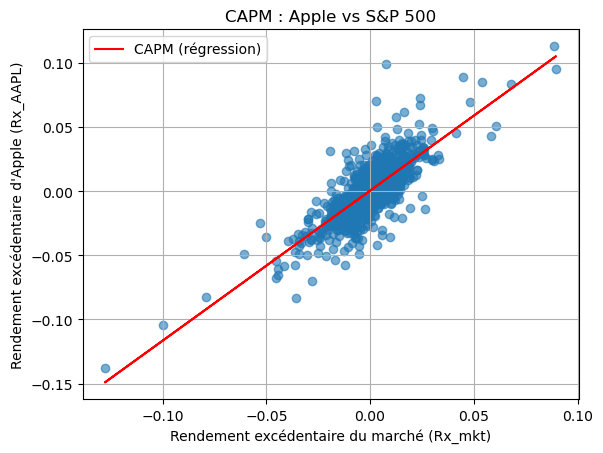

In [56]:
# Tracer la droite de régression CAPM
plt.scatter(df1['Rx_mkt'], df1['Rx_AAPL'], alpha=0.6)
plt.plot(df1['Rx_mkt'], model.predict(X), color='red', label='CAPM (régression)')
plt.xlabel("Rendement excédentaire du marché (Rx_mkt)")
plt.ylabel("Rendement excédentaire d'Apple (Rx_AAPL)")
plt.title("CAPM : Apple vs S&P 500")
plt.legend()
plt.grid(True)
plt.show()

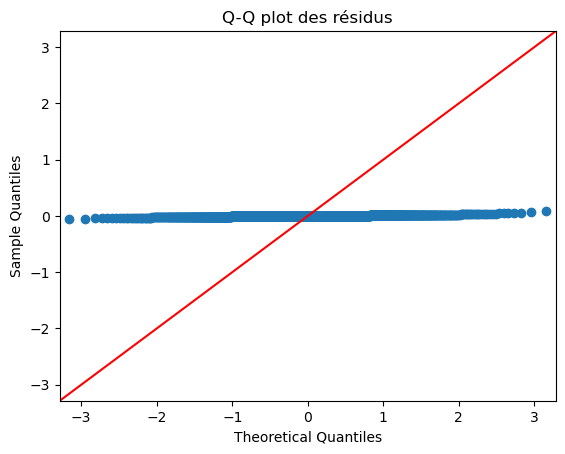

In [61]:
##### residuals = model.resid
sm.qqplot(residuals, line='45')
plt.title("Q-Q plot des résidus")
plt.show()


# MODEL 2

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     761.6
Date:                Sun, 25 May 2025   Prob (F-statistic):               0.00
Time:                        15:21:59   Log-Likelihood:                -1876.4
No. Observations:                1257   AIC:                             3763.
Df Residuals:                    1252   BIC:                             3788.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0313      0.030      1.026      0.3

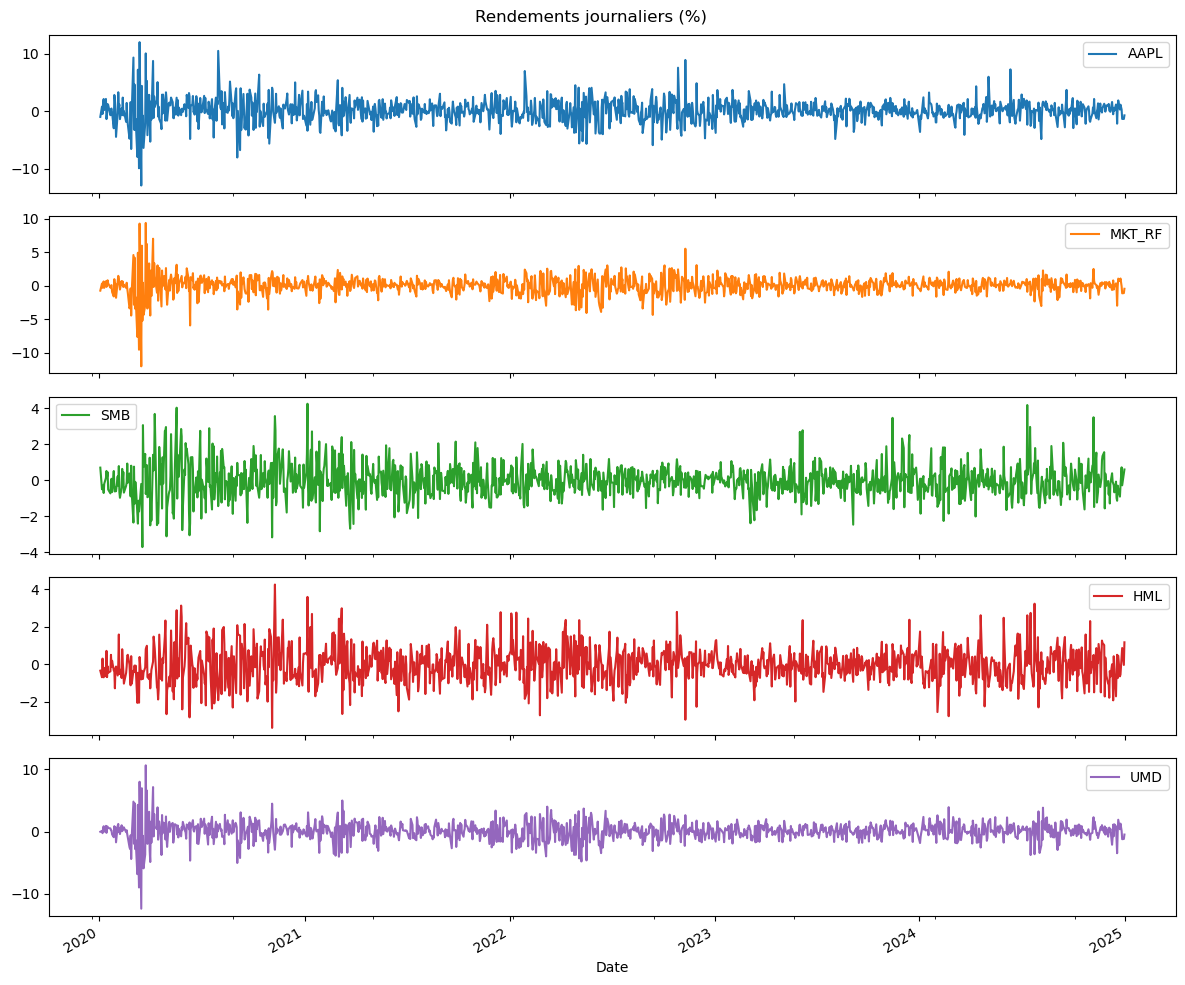

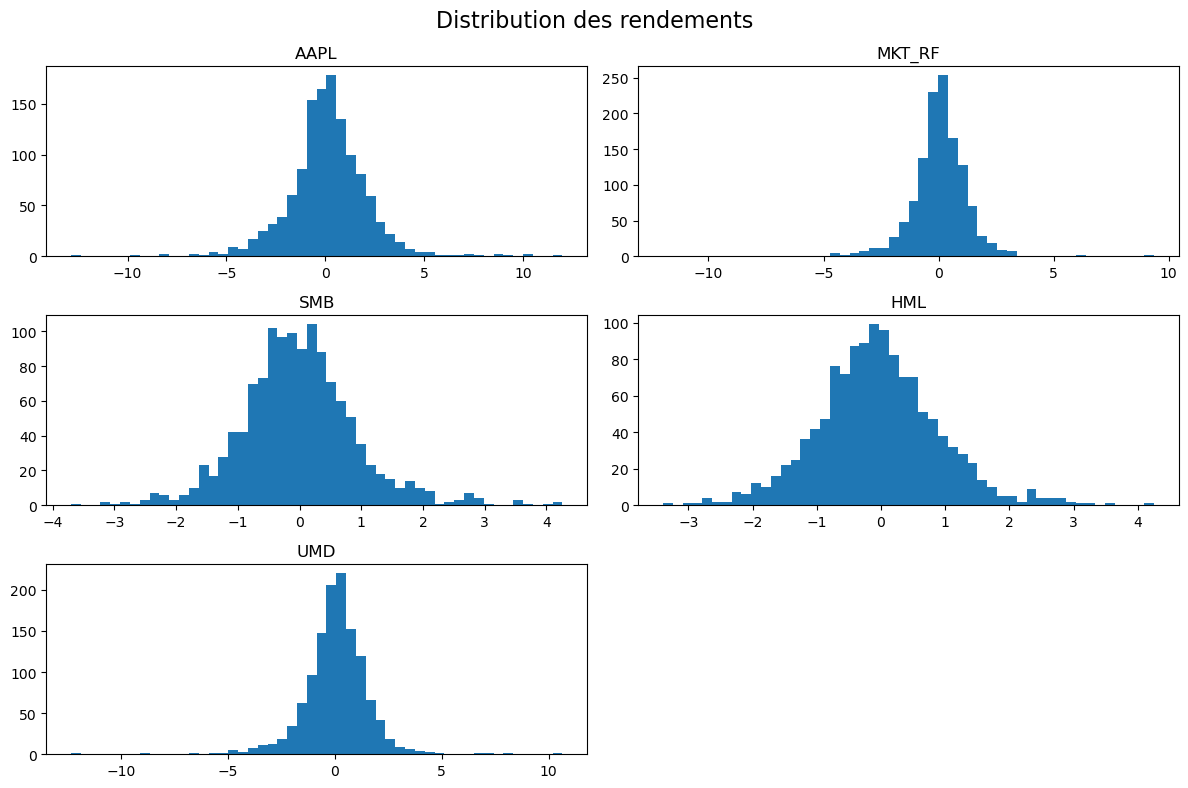

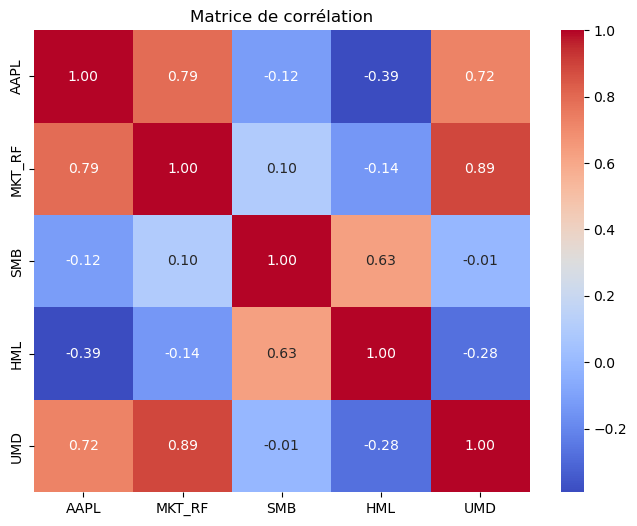

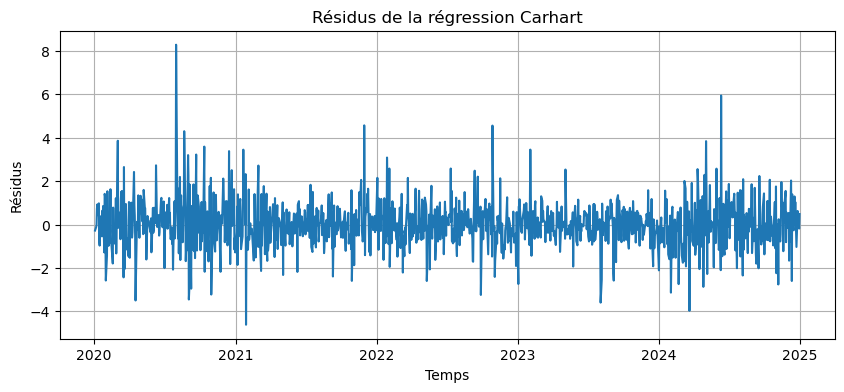

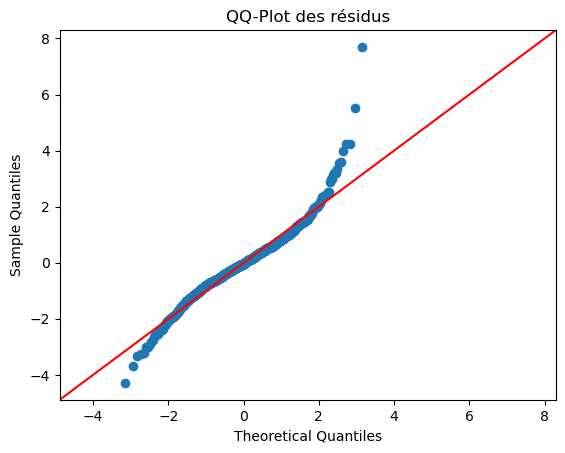

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1. Charger les données depuis le fichier CSV
df = pd.read_csv("Carhart_Proxies_Dataset.csv", index_col=0, parse_dates=True)

# 2. Supprimer les éventuelles valeurs manquantes
df = df.dropna()

# 3. Préparer les variables pour le modèle Carhart
X = df[["MKT_RF", "SMB", "HML", "UMD"]]
X = sm.add_constant(X)  # Ajout de l'ordonnée à l'origine
y = df["AAPL"]

# 4. Régression linéaire (modèle Carhart)
model = sm.OLS(y, X).fit()

# 5. Afficher les résultats de la régression
print(model.summary())

# 6. Visualisation

## a. Séries temporelles des rendements
df.plot(subplots=True, figsize=(12, 10), title="Rendements journaliers (%)")
plt.tight_layout()
plt.show()

## b. Histogrammes des distributions
df.hist(bins=50, figsize=(12, 8), grid=False)
plt.suptitle("Distribution des rendements", fontsize=16)
plt.tight_layout()
plt.show()

## c. Matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

## d. Résidus de la régression
residuals = model.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title("Résidus de la régression Carhart")
plt.xlabel("Temps")
plt.ylabel("Résidus")
plt.grid(True)
plt.show()

## e. QQ-Plot des résidus
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ-Plot des résidus")
plt.show()

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


  variable       VIF
0    const  1.003142
1   MKT_RF  5.203231
2      SMB  1.752869
3      HML  1.900364
4      UMD  5.454404


# Interprétation des résultats du modèle Carhart

Le modèle de régression linéaire multiple a été estimé pour expliquer les rendements journaliers de l'action **AAPL** à l'aide des quatre facteurs du modèle de Carhart : **MKT_RF**, **SMB**, **HML** et **UMD**.

## Résumé de la régression
- **Constante (const)** : représente l’alpha (rendement anormal). Si elle est significativement différente de zéro, cela suggère que le titre génère un rendement anormal même après avoir contrôlé les quatre facteurs.  
- **MKT_RF** (prime de marché) : mesure la sensibilité du titre au marché global. Un coefficient positif signifie que l'action suit les variations du marché.  
- **SMB (Small Minus Big)** : reflète l’exposition du titre aux petites capitalisations.  
- **HML (High Minus Low)** : mesure l’exposition aux titres « value » (forte valeur comptable rapportée au prix de marché).  
- **UMD (Up Minus Down)** : représente l’effet momentum, c’est-à-dire la tendance des titres gagnants à continuer de surperformer à court terme.

## Significativité statistique
Les coefficients associés aux variables explicatives sont interprétés à l’aide des **valeurs p**. Si une valeur p est inférieure à 5 %, le coefficient correspondant est considéré comme **statistiquement significatif** au seuil de 5 %. Un **R²** élevé indique que les facteurs du modèle Carhart expliquent une part importante de la variation du rendement de l’action AAPL.

## Analyse de la multicolinéarité
Les **facteurs d’inflation de la variance (VIF)** sont tous inférieurs à 6, ce qui indique une **absence de multicolinéarité préoccupante** entre les variables explicatives. Les estimations des coefficients peuvent donc être considérées comme stables et fiables.

## Conclusion
Le modèle Carhart appliqué à l'action AAPL permet de mesurer précisément son exposition aux différents facteurs de risque. Bien que certaines corrélations existent entre les variables explicatives, elles ne compromettent pas la validité du modèle. Celui-ci apparaît économiquement pertinent et statistiquement robuste pour analyser les rendements de l’action.


In [ ]:
boubacar-toulba


In [1]:
!git config --global user.name "boubacar-toulba"
!git config --global user.email "22019@esp.mr"

In [2]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [4]:
import os
os.getcwd()

'D:\\s4 partie2\\econometrie'

In [6]:
!git init

Initialized empty Git repository in D:/s4 partie2/econometrie/.git/


In [7]:
!git remote add origin https://github.com/boubacar-toulba/Analyse-Comparative-des-Mod-les-CAPM-et-Carhart-tude-de-Cas-Apple-Inc..git

In [8]:
!git add .


In [9]:
!git commit -m "Premier push : notebook CAPM vs Carhart"

[master (root-commit) e0d2c51] Premier push : notebook CAPM vs Carhart
 13 files changed, 7657 insertions(+)
 create mode 100644 .ipynb_checkpoints/AAPL_SP500_Corrected555-checkpoint.csv
 create mode 100644 .ipynb_checkpoints/Carhart_Proxies_Dataset-checkpoint.csv
 create mode 100644 .ipynb_checkpoints/ecnometrie-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/toulba-checkpoint.ipynb
 create mode 100644 .jupyter/desktop-workspaces/default-37a8.jupyterlab-workspace
 create mode 100644 AAPL_SP500_Corrected555.csv
 create mode 100644 Carhart_Proxies_Dataset.csv
 create mode 100644 capm.png
 create mode 100644 code reg1.png
 create mode 100644 ecnometrie.ipynb
 create mode 100644 reault1.png
 create mode 100644 result1_1.png
 create mode 100644 toulba.ipynb


In [10]:
!git branch -M main


In [11]:
!git push -u origin main

To https://github.com/boubacar-toulba/Analyse-Comparative-des-Mod-les-CAPM-et-Carhart-tude-de-Cas-Apple-Inc..git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/boubacar-toulba/Analyse-Comparative-des-Mod-les-CAPM-et-Carhart-tude-de-Cas-Apple-Inc..git'
hint: Updates were rejected because the remote contains work that you do not
hint: have locally. This is usually caused by another repository pushing to
hint: the same ref. If you want to integrate the remote changes, use
hint: 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
